In [1]:
import numpy as np
import pandas as pd

In [63]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [64]:
!kaggle datasets download -d rakeshrau/social-network-ads

  0% 0.00/3.27k [00:00<?, ?B/s]
100% 3.27k/3.27k [00:00<00:00, 9.41MB/s]


In [65]:
#unzipping
import zipfile
zip_ref = zipfile.ZipFile('/content/social-network-ads.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [66]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [67]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [68]:
df = df[['Age','EstimatedSalary','Purchased']]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [69]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

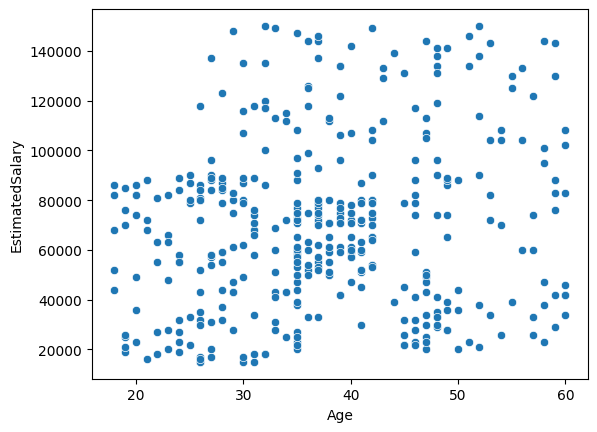

In [70]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [71]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [73]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [74]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [75]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               384       
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [77]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 5614.5537 - accuracy: 0.3469 - val_loss: 2472.7104 - val_accuracy: 0.4000
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 1135.2362 - accuracy: 0.4594 - val_loss: 1307.3221 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 1047.7937 - accuracy: 0.6531 - val_loss: 539.5209 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 410.7083 - accuracy: 0.4656 - val_loss: 338.6922 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 270.1495 - accuracy: 0.5594 - val_loss: 42.4854 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 161.6512 - accuracy: 0.4781 - val_loss: 236.4373 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 121.0123 - accuracy: 0.4906 - val_loss: 155.0008 - v

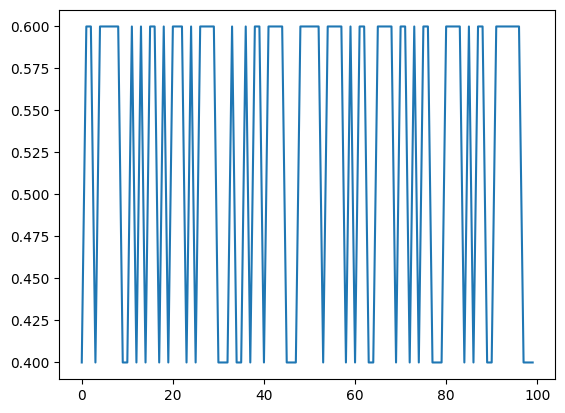

In [78]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [79]:
# Applying scaling

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

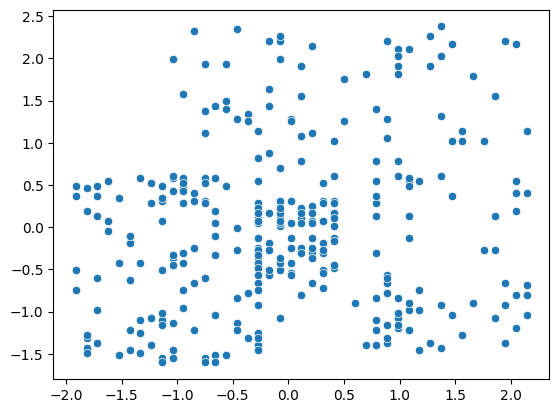

In [82]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [83]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 30ms/step - loss: 0.6429 - accuracy: 0.7312 - val_loss: 0.5973 - val_accuracy: 0.8500
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5898 - accuracy: 0.8250 - val_loss: 0.5460 - val_accuracy: 0.8875
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5446 - accuracy: 0.8562 - val_loss: 0.5036 - val_accuracy: 0.8750
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5081 - accuracy: 0.8719 - val_loss: 0.4681 - val_accuracy: 0.8125
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4767 - accuracy: 0.8687 - val_loss: 0.4386 - val_accuracy: 0.8125
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4487 - accuracy: 0.8562 - val_loss: 0.4146 - val_accuracy: 0.8125
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4248 - accuracy: 0.8625 - val_loss: 0.3933 - val_accuracy: 0.8250
Epoch 8/100


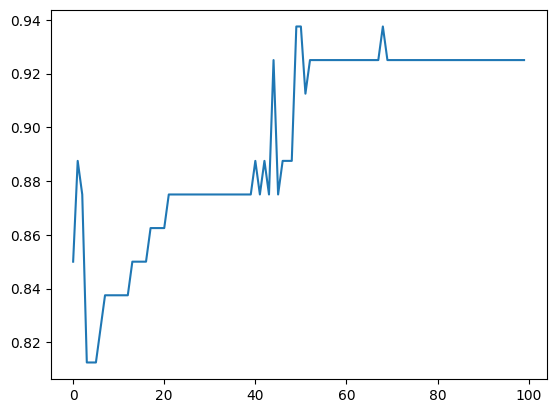

In [84]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [ ]:
#we can see here learning is better, stable learning